In [1]:
from data_loader.utils import load_image_by_cv2
import os
import matplotlib.pyplot as plt
from image_segmentation.hough_lines import HoughLines
from settings import DATA_PATH
import glob
import numpy as np

In [2]:
file_name = 'law.jpg'
file_path = os.path.join("base_dataset", "cartoon", file_name)
image = load_image_by_cv2(file_path)

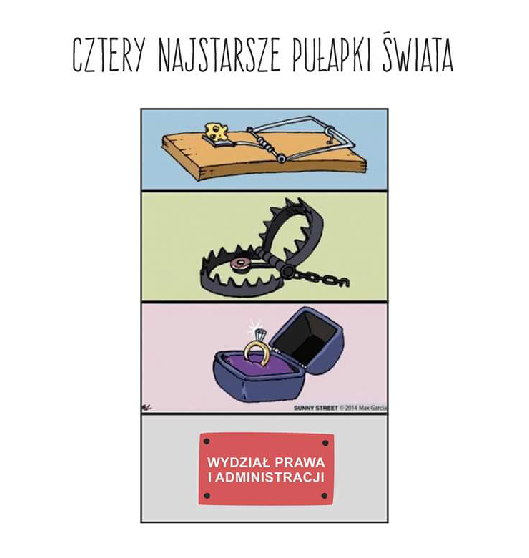

In [3]:
plt.figure(figsize = (10, 10))
plt.axis("off")
plt.imshow(image)
plt.show()

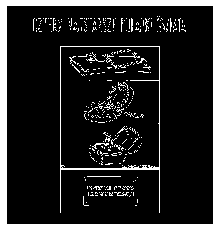

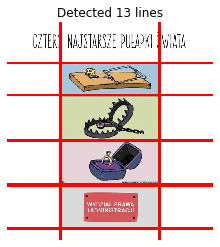

306

In [4]:
hl = HoughLines()
img, edges_norm, auto_line_len = hl.get_image_with_lines(image, 300, plot=True)
auto_line_len

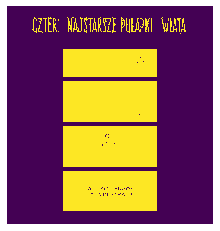

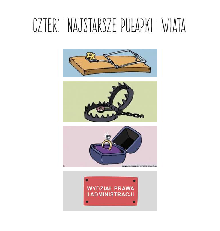

1

In [5]:
bounding_boxes = hl.get_bounding_boxes(img, plot=True)
len(bounding_boxes)

# Experiments 

In [6]:
def hough_tests_50(plot=True):
    images_path = os.path.join(DATA_PATH, "base_dataset", "segmentation", "tests")
    file_names_full = glob.glob(images_path + '/*')
    file_names = [fn.split('/')[-1] for fn in file_names_full]
    labels = [int(fn.split('.')[-2][-1]) for fn in file_names]

    if plot:
        labels_no, labels_count = np.unique(labels, return_counts=True)
        plt.bar(labels_no, labels_count)
        plt.xlabel('number of pictures on single meme')
        plt.ylabel('number of memes')
        plt.show()

    wrong_label = 0

    for label, file_name in zip(labels, file_names_full):
        image = load_image_by_cv2(file_name)

        hl = HoughLines()
        im, norm_edges, auto_min_line_len = hl.get_image_with_lines(image)
        boxes = hl.get_bounding_boxes(im, plot=False)
        if len(boxes) != label:
            if plot:
                hl.get_bounding_boxes(im, plot=True, plot_title=f'{len(boxes)} instead {label} bounding boxes')
                # print(file_name.split('/')[-1])
            wrong_label += 1

    print(f'Wrongly labeled images: {wrong_label}/{len(file_names)}')

In [11]:
def single_test(img_name, l=None):
    images_path = os.path.join(DATA_PATH, "base_dataset", "segmentation", "tests")
    file_name = glob.glob(f'{images_path}/{img_name}*')[0]
    label = int(file_name.split('_')[-1][0])

    image = load_image_by_cv2(file_name)
    x, y, _ = image.shape
    print(f'\nImage shape: ({x}, {y})')

    hl = HoughLines()

    print(f'\nMinimum no of points: {"automatic" if l is None else l}')
    im, norm_edges, auto_min_line_len = hl.get_image_with_lines(image, l, plot=True)
    print(f'Normalized edges: {norm_edges}')
    print(f'Automatic value of min_lines: {auto_min_line_len}')
    
    boxes = hl.get_bounding_boxes(im, plot=True)
    print(f'Bounding boxes: {len(boxes)}\n{boxes}')

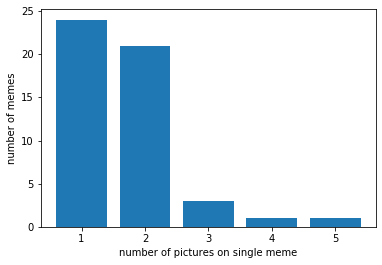

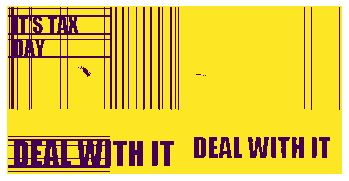

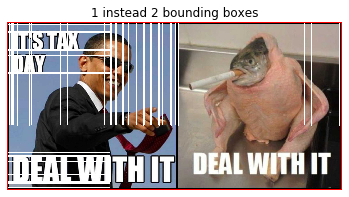

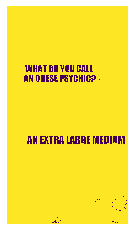

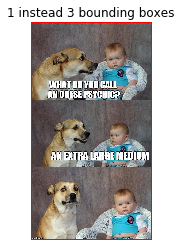

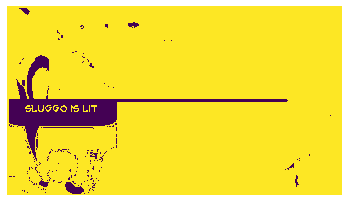

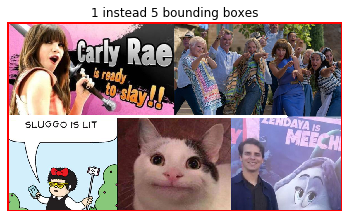

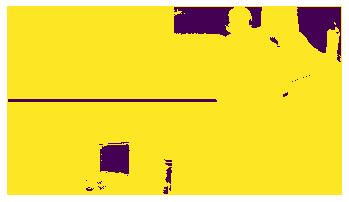

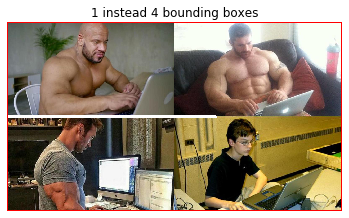

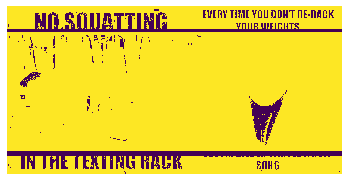

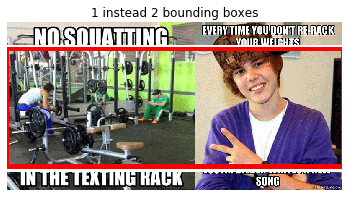

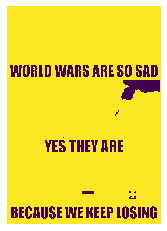

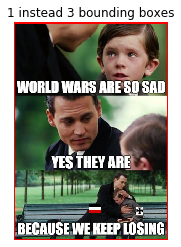

Wrongly labeled images: 6/50


In [8]:
hough_tests_50(plot=True)


Image shape: (834, 587)

Minimum no of points: 320
Normalized edges: 0.0673
Automatic value of min_lines: 394
Bounding boxes: 3
[[0, 573, 587, 234], [0, 276, 587, 286], [0, 1, 587, 264]]


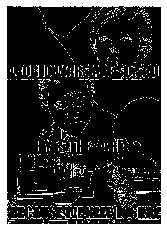

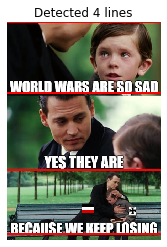

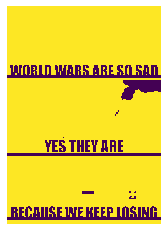

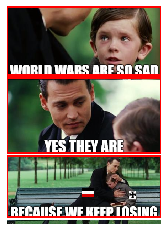

In [12]:
single_test('m7xtfyksb9u31_3', 320)